# 데이터 이해

## 데이터 종류
> 일반적으로 데이터의 종류에는 3가지로 나눌 수 있다.   
> 정형 데이터, 반정형 데이터, 비정형 데이터

- 스키마(schema)
> 데이터의 구조와 제약 조건에 대한 것들을 정의한 것


### 정형 데이터(Structured Data)
> 고정된 필드(스키마를 철저히 따른)에 저장된 데이터   
> 예) 관계형 데이터베이스, 스프레드시트(엑셀) 등

### 반정형 데이터(Semi-Structured Data)
> 고정된 필드에 저장되어 있지는 않지만, 메타데이터나 스키마 등을 포함하는 데이터이다.   
> 예) XML, HTML, JSON, 이메일 등

### 비정형 데이터(Unstructured Data)
> 고정된 필드에 저장되어 있지 않은 데이터   
> 예) 텍스트, 이미지, 동영상, 음성 데이터 등

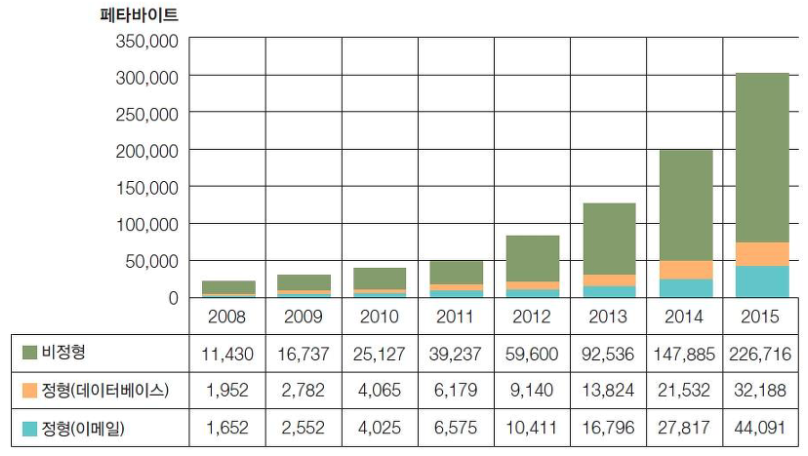

## 데이터 유형

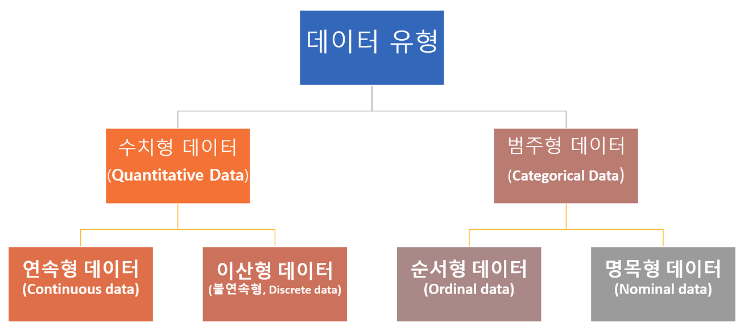

### 수치형 데이터(정량적 데이터, Quantitative Data)
> 수치형 데이터는 수치를 값으로 가집니다. 따라서 수학적인 활용이 가능합니다.  
> 예) 나이, 키, 온도 등

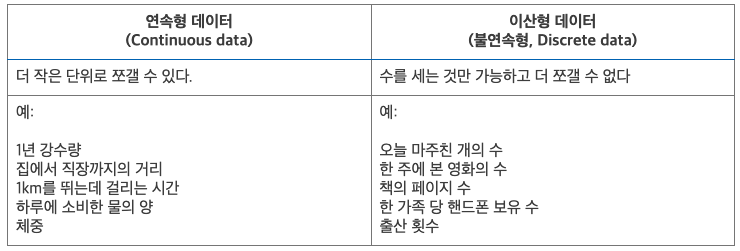

### 범주형 데이터(Categorical Data)
> 범주형 데이터는 범주 또는 그룹으로 나타나는 데이터입니다.   
> 예) 교과목 성적, 성별, 영화 별점, 우편번호 등

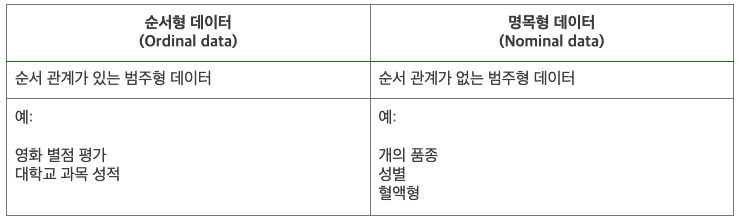

# [Data Leakage(데이터 누수, 정보 누설)](https://dacon.io/competitions/official/236055/talkboard/407731?page=1&dtype=recent)
- 미래에 대한 전혀 알 수 없는 대한 정보가 모델 학습에서 사용된 경우를 말합니다.
- 즉 test 데이터가 모델의 학습에 이용된 경우입니다.

즉, Test 데이터들의 모든 정보는 모두 '미래'로 간주하여 모델의 학습에 관여, 활용 할 수 없습니다.

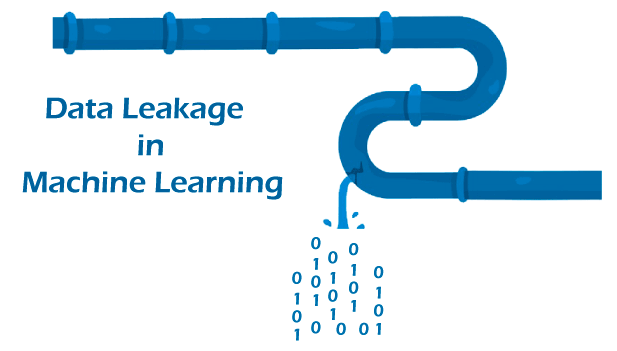

## 대표적인 Data Leakage에 해당하는 사례
- Label Encoding 시 Test 데이터로부터 Encoder를 fit 시키는 경우
- Scaler 사용 시 Test 데이터로부터 Scaler를 fit 시키는 경우
- Test 데이터에 대한 결측치 보간 시 Test 데이터의 통계 정보(평균, 최빈값 등)를 사용하는 경우
- 파생변수를 생성할 시 2개 이상의 Test 데이터들의 정보를 활용할 경우
- Test 데이터들의 이동 평균을 활용하는 경우
- Test 데이터들을 모델 학습에 활용하는 경우 (이번 해커톤에서는 Pseudo-Labeling도 허용하지 않습니다)
- Test 데이터에 pandas의 get_dummies() 함수를 적용하는 경우
- Test 데이터의 index 정보 혹은 row 개수 정보를 활용하는 경우
- Test 데이터로부터 EDA를 진행한 결과(인사이트)를 전처리, 모델 학습에 적용하는 경우
- 이 밖의 Test 데이터들의 정보를 모델 학습에 활용하는 모든 경우

## 대표적인 Data Leakage에 해당하지 않는 사례
- 독립적인 샘플(행(row)) 내에서의 모든 연산 혹은 파생 변수 생성
  - 예를 들어, Test['C'] = Test['A'] + Test['B']와 같이 독립적인 샘플 내에서 A Column과 B Column을 더한 새로운 파생 변수 C Column을 생성하는 경우
- Train 데이터의 통계 정보를 Test 데이터에 적용하여 전처리하는 경우 혹은 파생 변수를 생성하는 경우
- Test 데이터의 결측치를 Train 데이터의 통계 정보를 바탕으로 보간하는 경우 등등

# EDA(Exploratory Data Analysis)
> 탐색적 데이터 분석.  
> 데이터를 분석하고 결과를 도출하는 과정에 있어서 지속적으로 해당 데이터에 대한 탐색과 이해를 기본적으로 가져야 한다는 의미.  

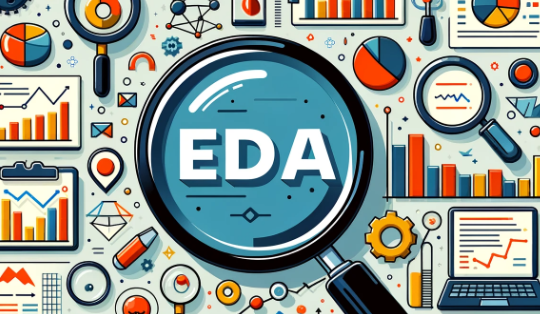

## 분석 방법

### 상관계수
> 두 변수 x,y 사이의 상관관계의 정도를 나타내는 수치  
> 상관계수는 피어슨(Karl Pearson)에 의하여 제안되었기 때문에 피어슨의 상관계수라고도 한다.

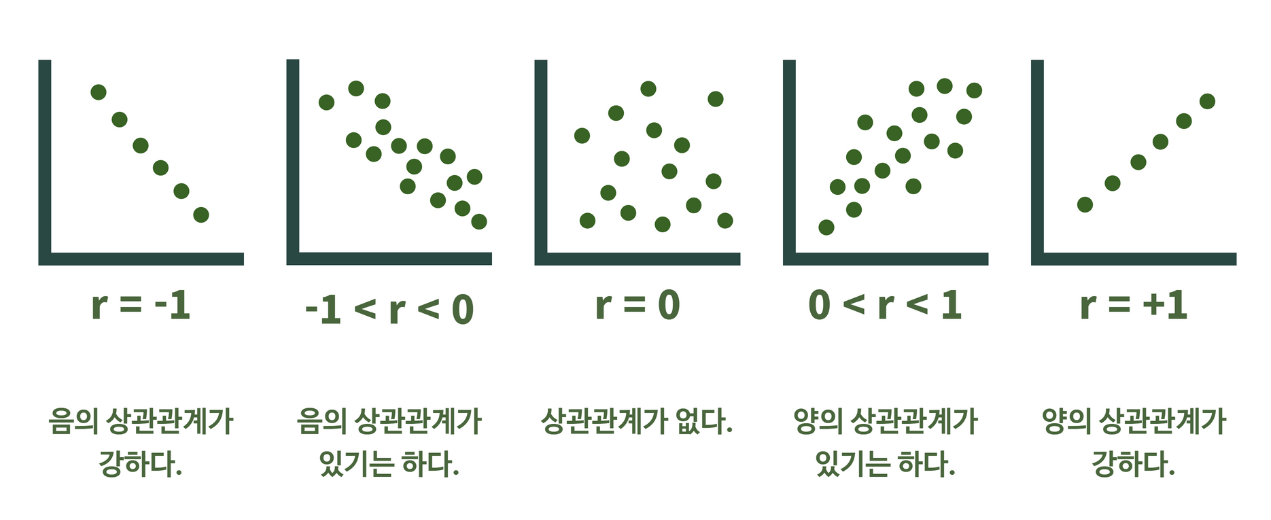

- 상관계수의 특징
  - 상관계수 r은 항상 -1과 1 사이에 있다.
  - 상관계수의 절대값의 크기는 직선관계에 가까운 정도를 나타낸다.
  - 상관계수의 부호는 관계의 방향을 나타낸다.(음의 상관관계, 양의 상관관계)
  - 상관계수가 0에 가까울 수록 상관관계가 없다.
  - 상관계수는 단위가 없다.

- 상관계수의 해석
> 큰 상관계수값이 항상 두 변수 사이의 인과관계를 의미하지는 않는다.   
> 그 이유는 인지하지 못한 여러 잠재변수가 있을 수 있기 때문이다. 따라서 이를 이해하고 해석하기 위해서는 해당 분야의 전문적인 해석이 필요하다.  
> - 예) 크기가 아주 다른 몇 개의 도시에서 매월 발생한 살인사건의 발생 건수와 종교집회 횟수를 조사하면 양의 상관계수를 가질 것이다. 그렇다고 종교집회를 줄이면 살인사건이 줄어들지는 않을 것이다. 도시주민 수, 교육 수준 등 다양한 잠재변수들에 의하여 살인사건의 발생 건수와 종교집회 횟수가 영향을 받기 때문이다.

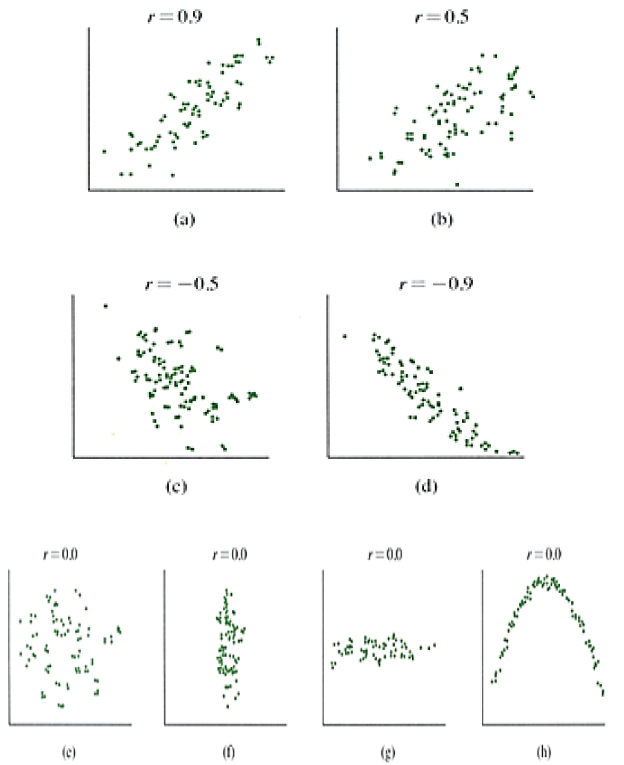

### 왜도(Skewness)
> DataFrame.skew()를 이용하여 확인할 수 있다.
  
- skewness 해석
  - -0.5 ~ 0.5: 상당히 대칭적
  - -1 ~ -0.5 또는 0.5 ~ 1: 적당히 치우침
  - -1보다 작거나 1보다 큰경우: 상당치 치우팀


- 데이터 분포의 비대칭도를 나타내는 통계량
- 분포가 오른쪽으로 치우쳐져 있고, 왼쪽으로 긴꼬리를 가진경우 왜도는 음수
- 분포가 왼쪽으로 치우쳐져 있고, 오른쪽으로 긴꼬리를 가진경우 왜도는 양수
- 정규분포와 같이 좌우 대칭인경우 왜도는 0에 가까워진다.

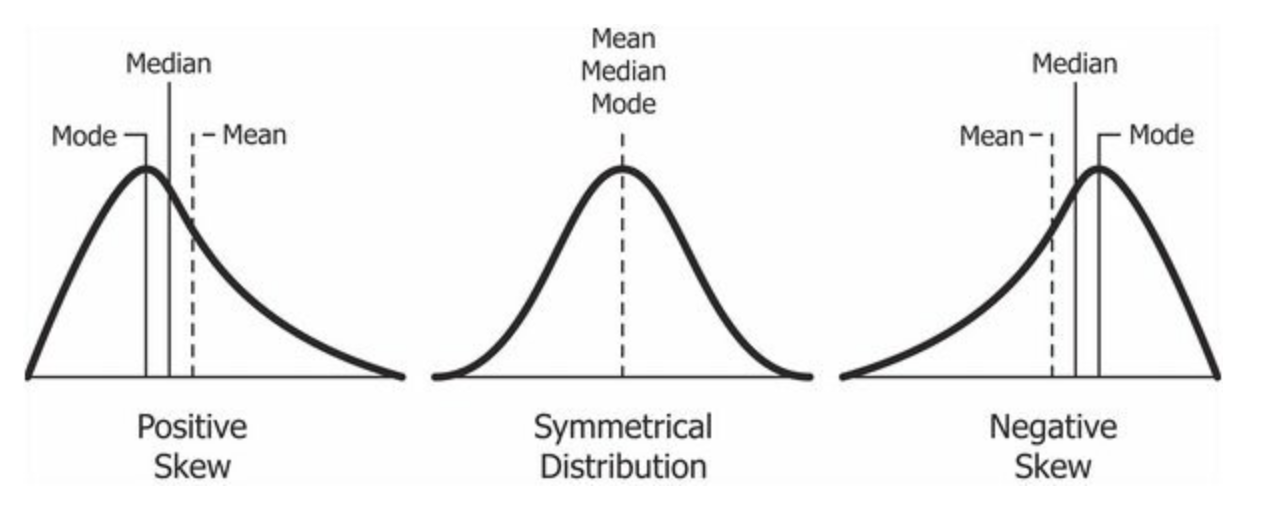

### 첨도
> DataFrame.kurt()를 이용하여 확인할 수 있다.

- kurtosis 해석
  - Mesokurtic(kurtosis=3): 정규 분포와 유사한 첨도 통계량이다.
  - Leptokurtic(kurtosis>3): 피크는 Mesokurtic보다 높고 날카롭기 때문에 데이터는 꼬리가 무겁거나 특이치(outlier)가 많다는 것을 의미한다.
  - Platykurtic(kurtosis<3): 피크는 Mesokurtic보다 낮고 넓으며, 이는 데이터가 가벼운 편이나 특이치(outlier)가 부족하다는 것을 의미한다.


- 활률 분포의 뽀족한 정도를 나타내는 지표
- 관측치들이 얼마나 집중적으로 중심에 몰려있는지 측정 시 사용
- kurt 값이 0보다 작을 경우에는 정규분포보다 더 완만하고 납작한 분포를 가진다.
- kurt 값이 0보다 크면 정규분포보다 더 뽀족한 분포를 가진다.

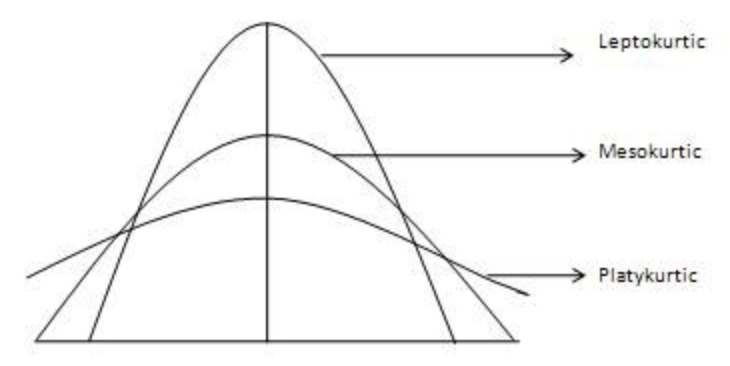

### 이상치
> 데이터 분석을 할 때, 평균이나 표준편차를 많이 사용한다. 이런 경우 데이터에 이상치가 있으면 왜곡된 의미를 전달할 가능성이 높다. 그래서 이상치가 있는지를 확인할 필요가 있고, 박스플롯을 활용하면 이상치가 얼마나 포함되어 있는지를 쉽게 판단할 수 있다.

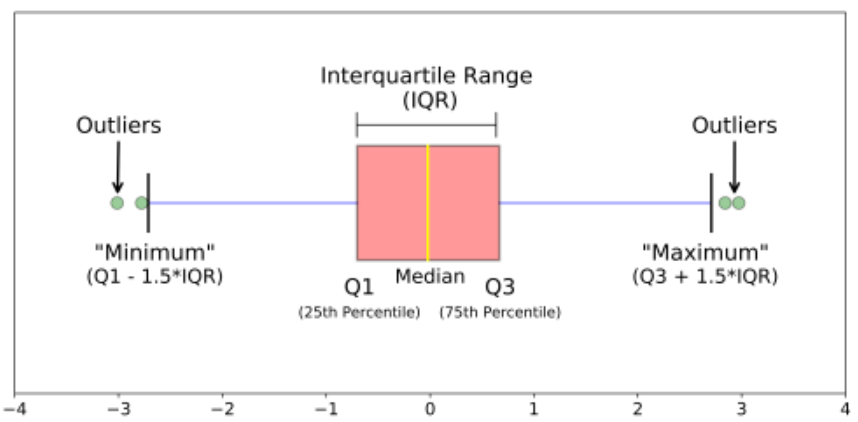

# 예제

## 타이타닉
- 타이타닉(Titanic)은 영국의 화이트 사트 라인이 운영한 북대서양 횡단 여객선이다.
- 1912년 4월 10일 영국의 사우샘프턴을 떠나 미국의 뉴욕으로 향하던 첫 항해 중에 4월 15일 빙산과 충돌하여 침몰하였다.
- 배에는 승객들을 태울 충분한 구명보트가 없었고, 타이타닉의 침몰로 2,224명의 승객 중 1,502명이 사망하였다.

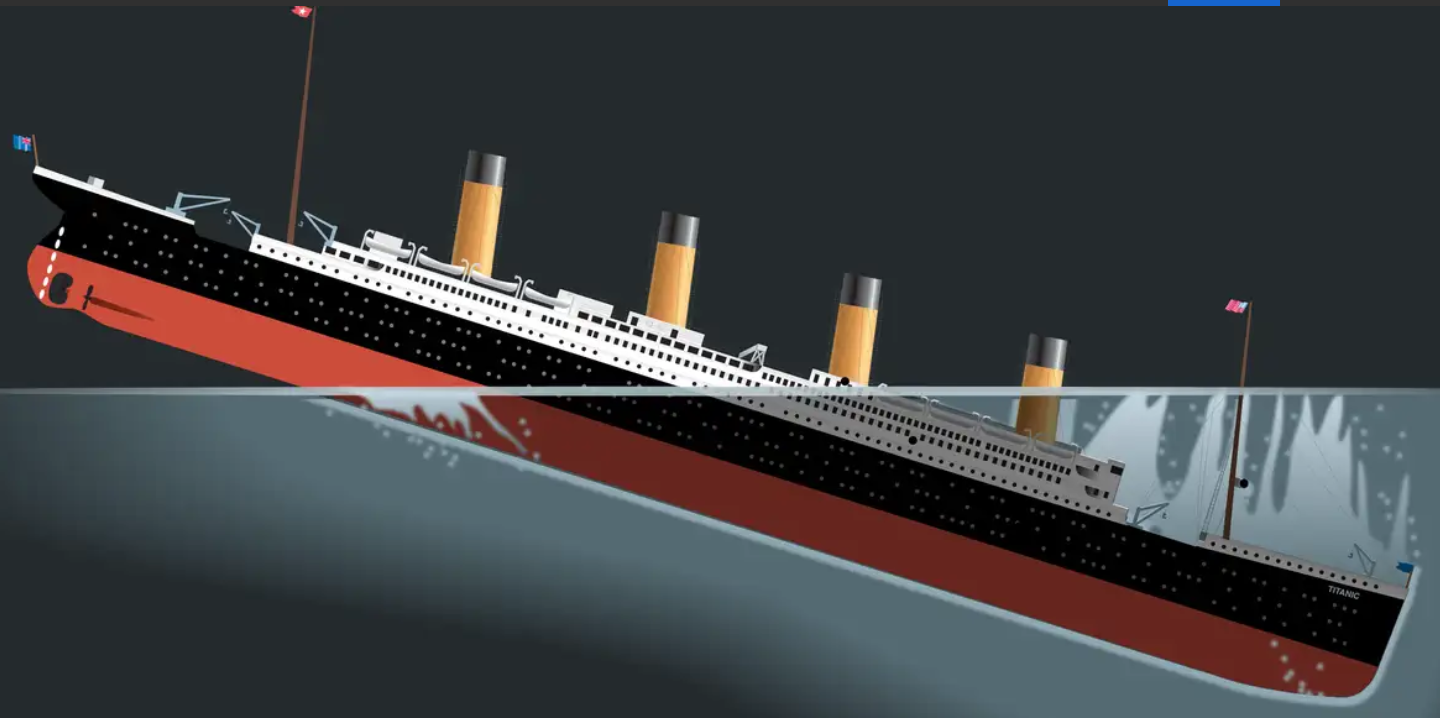

### 타이타닉 데이터
- 타이타닉 사고를 바탕으로한 학습용 데이터셋이다.
- 승객들의 정보들을 바탕으로 생존 여부를 예측하는 학습 데이터셋으로 사용되고 있다.

### 컬럼정보
1. survived: 생존 여부(0: 사망, 1: 생존)
2. pclass: 객실등급(1: 1등급, 2: 2등급, 3: 3등급)
3. sex: 성별(male: 남자, female: 여자)
4. age: 나이
5. sibsp: 함께 탑승한 형제 및 배우자 수
6. parch: 함께 탑승한 자녀 및 부모 수
7. fare: 요금
8. embarked: 탑승지(C: Cherbourg, Q: Queenstown, S: Southampton)
9. class: 객실 등급(First: 1등급, Second: 2등급, Third: 3등급)
10. who: man(남자), woman(여자), child(아이)
11. adult_male: 성인 남자인지 여부(True: 성인남자, False: 그외)
12. deck: 선실번호 첫 알파벳
13. embark_town: 탑승지(Cherbourg, Queenstown, Southampton)
14. alive: 생존여부(no: 사망, yes: 생존)
15. alone: 혼자 탑승했는지 여부(True: 혼자 탑승, False: 가족과 탑승)

## 데이터 로드

- [타이타닉 데이터 로드](https://www.kaggle.com/c/titanic/)

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')

print(df.shape)
df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 수치형 데이터 분석

In [7]:
df_number = df.select_dtypes(include=np.number)
df_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [8]:
df_number.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### 통계적 분석

In [9]:
df_number.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_number['parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [12]:
df_number['parch'].value_counts()

,count
parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


age 통계적 분석

In [13]:
df_number['age'].sum() # 총합

21205.17

In [14]:
df_number['age'].mean() # 평균

29.69911764705882

In [15]:
df_number['age'].median() # 중앙값

28.0

In [16]:
df_number['age'].var() # 분산

211.01912474630802

In [17]:
df_number['age'].std() # 표준편차

14.526497332334042

In [18]:
df_number['age'].min() # 최소값

0.42

In [19]:
df_number['age'].max() # 최대값

80.0

In [20]:
df_number['age'].quantile([0.25, 0.5, 0.75]) # 분위수 계산

,age
0.25,20.125
0.50,28.000
0.75,38.000


### 첨도 분석

In [21]:
df_number['fare'].kurt()

33.39814088089868

<Axes: ylabel='Frequency'>

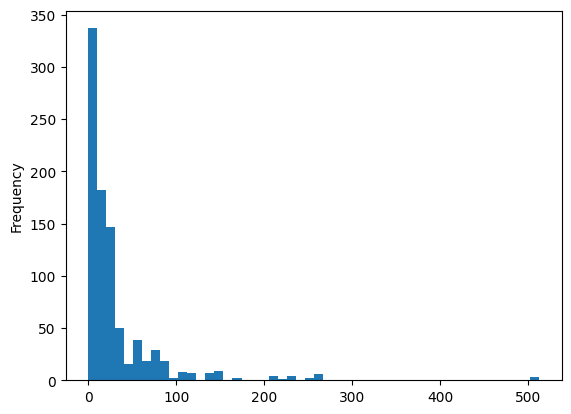

In [22]:
df_number['fare'].plot.hist(bins=50)

In [24]:
df_number['fare'][:5]

,fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500


<Axes: >

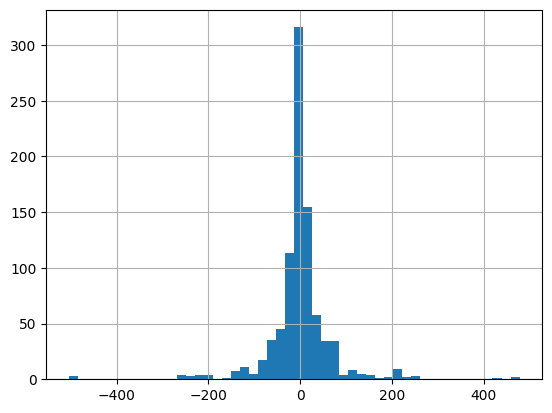

In [23]:
# diff(): 한 객체 내에서 열과 열 / 행과 행의 차이를 출력하는 메서드 입니다.
df_number['fare'].diff().hist(bins=50)

### 왜도 분석

In [25]:
df_number['fare'].mean(), df_number['fare'].median(), df_number['fare'].mode()

(32.204207968574636,
 14.4542,
 0    8.05
 Name: fare, dtype: float64)

In [26]:
df_number['fare'].skew()

4.787316519674893

<Axes: ylabel='Frequency'>

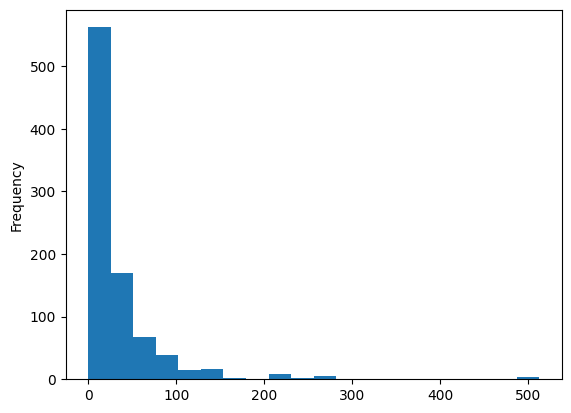

In [27]:
df_number['fare'].plot.hist(bins=20)

<Axes: >

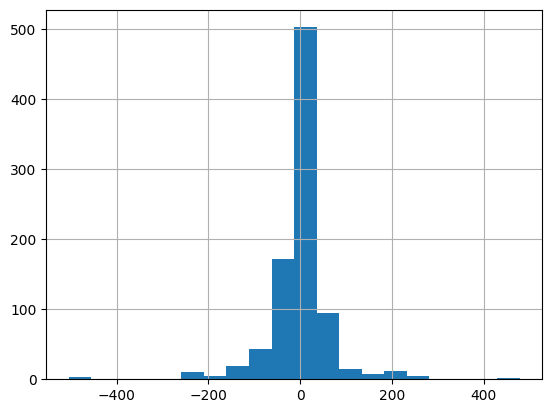

In [28]:
df_number['fare'].diff().hist(bins=20)

### 이상치 분석

<Axes: ylabel='age'>

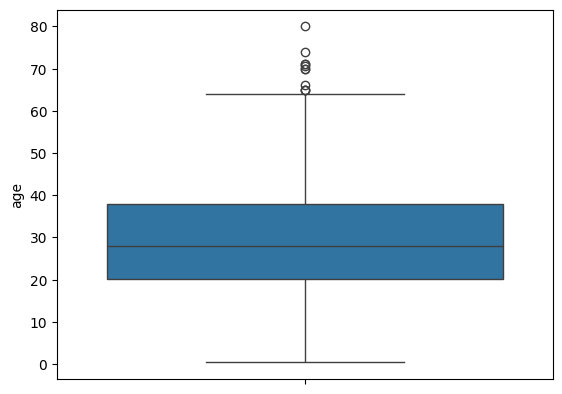

In [ ]:
sns.boxplot(y=df_number['age'], data=df)

<Axes: xlabel='survived', ylabel='age'>

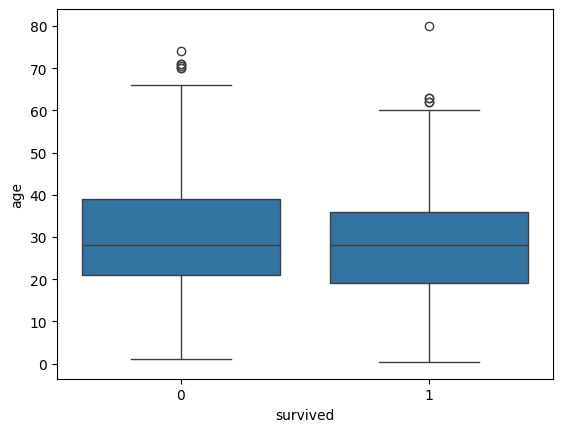

In [29]:
sns.boxplot(x=df['survived'], y=df['age'], data=df)

### 상관관계 분석

In [31]:
# fare > age 생존 더 큰 영향을 미치는 구나
df_number.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: xlabel='pclass', ylabel='fare'>

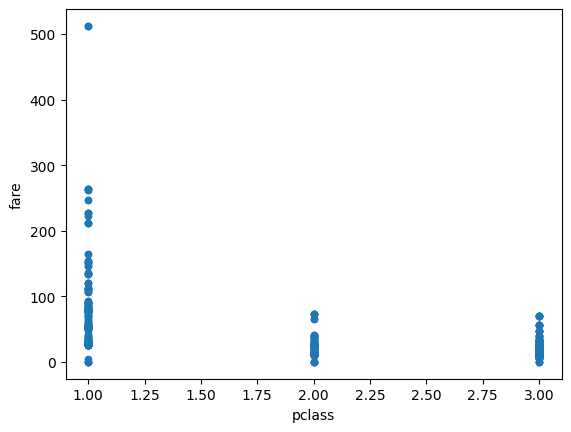

In [32]:
df_number.plot(kind='scatter', x='pclass', y='fare')

<Axes: xlabel='age', ylabel='fare'>

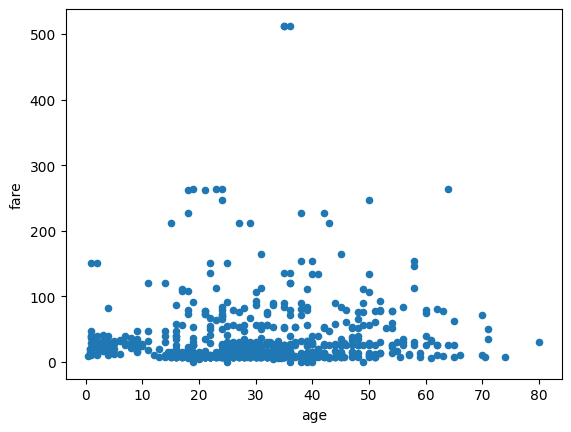

In [33]:
df_number.plot(kind='scatter', x='age', y='fare')

<Axes: >

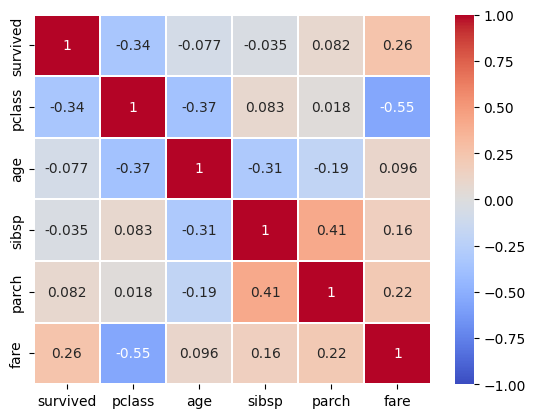

In [34]:
sns.heatmap(df_number.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap='coolwarm')

## 범주형 데이터 분석

In [35]:
df_object = df.select_dtypes(exclude=np.number)

In [36]:
df_object = df_object.join(df_number['survived']) # survived 추가
df_object['survived'] = df_object['survived'].astype('object') # 데이터 타입 변경
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          891 non-null    object  
 1   embarked     889 non-null    object  
 2   class        891 non-null    category
 3   who          891 non-null    object  
 4   adult_male   891 non-null    bool    
 5   deck         203 non-null    category
 6   embark_town  889 non-null    object  
 7   alive        891 non-null    object  
 8   alone        891 non-null    bool    
 9   survived     891 non-null    object  
dtypes: bool(2), category(2), object(6)
memory usage: 45.8+ KB


In [37]:
df_object.head()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived
0,male,S,Third,man,True,NaN,Southampton,no,False,0
1,female,C,First,woman,False,C,Cherbourg,yes,False,1
2,female,S,Third,woman,False,NaN,Southampton,yes,True,1
3,female,S,First,woman,False,C,Southampton,yes,False,1
4,male,S,Third,man,True,NaN,Southampton,no,True,0


### 통계적 분석

In [38]:
df_object.describe()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived
count,891,889,891,891,891,203,889,891,891,891
unique,2,3,3,3,2,7,3,2,2,2
top,male,S,Third,man,True,C,Southampton,no,True,0
freq,577,644,491,537,537,59,644,549,537,549


embarked 통계적 분석

In [39]:
df_object['embarked'].nunique() # 고유값 개수

3

In [40]:
df_object['embarked'].unique() # 고유값

array(['S', 'C', 'Q', nan], dtype=object)

In [41]:
df_object['embarked'].mode() # 최빈값

,embarked
0,S


In [42]:
df_object['embarked'].value_counts() # 범주별 개수

,count
embarked,
S,644
C,168
Q,77


In [43]:
df_object["embarked"].value_counts(normalize=True) # 범주별 비율

,proportion
embarked,
S,0.724409
C,0.188976
Q,0.086614


### 교차분석

[pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)
- index: 행으로 그룹화할 값
- columns: 열로 그룹화할 값
- rownames: 행 이름
- colnames: 열 이름
- values: 두 행/열에 따라 집계할 값(반드시 aggfunc와 함께 사용)
- aggfunc: 집계 함수(mean, sum 등)
- margins: True인 경우, 행/열의 소계값이 함게 산출
- dropna: NaN을 포함하지 않고 반환(디폴트: True)
- normalize: 개수가 아닌 비율로 표시
  - index: 행을 기준으로 비율 표시
  - columns: 열을 기준으로 비율 표시
  - all: 전체 기준으로 비율 표시

In [44]:
pd.crosstab(df_object["sex"],df_object["survived"],margins = True)

survived,0,1,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [ ]:
pd.crosstab(df_object["sex"],df_object["survived"],margins=True, normalize= "all") # 전체 기준 데이터 비율

survived,0,1,All
sex,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
All,0.616162,0.383838,1.000000


In [45]:
pd.crosstab(df_object["sex"],df_object["survived"]
            ,margins=True, normalize= "index") # index 기준 데이터 비율

survived,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


In [46]:
pd.crosstab(df_object["sex"],df_object["survived"]
            , normalize= "index")

survived,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [47]:
pd.crosstab(df_object["sex"],df_object["survived"]
            ,margins=True, normalize= "columns") # columns 기준 데이터 비율

survived,0,1,All
sex,,,
female,0.147541,0.681287,0.352413
male,0.852459,0.318713,0.647587


In [48]:
pd.crosstab(df_object["sex"],df_object["survived"]
            , normalize= "columns")

survived,0,1
sex,,
female,0.147541,0.681287
male,0.852459,0.318713


## pivot_table 분석

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [50]:
df_pivot = pd.pivot_table(df,                # 피벗할 데이터프레임
                     index = 'pclass',    # 행 위치에 들어갈 열
                     columns = 'sex',    # 열 위치에 들어갈 열
                     values = 'survived',     # 데이터로 사용할 열
                     aggfunc = ['mean', 'sum'])   # 데이터 집계함수

df_pivot

mean              sum     
sex       female      male female male
pclass                                
1       0.968085  0.368852     91   45
2       0.921053  0.157407     70   17
3       0.500000  0.135447     72   47

3등석 보다 1등석에 탄 경우, 생존여부가 높게 나타나며,  
1등석, 2등석, 3등석 모두에서 여자가 남자보다 생존여부가 높게 나타나고 있다.

In [51]:
df_pivot = pd.pivot_table(df,
                     index = ['pclass','sex'],
                     columns = 'survived',
                     values = ['age','fare'],
                     aggfunc = ['mean','max'])

df_pivot

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
pclass sex                                                                
1      female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
2      female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
3      female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
pclass sex                       
1      female  151.55  512.3292  
       male    263.00  512.3292  
2      female   26.00   65.0000  
       male     73.50   39.0000  
3      female   69.55   31.3875  
       male     69.55   56.4958

3등석에 탄 여자 중 생존한 사람들의 최고 연령은 63세이다.  
2등석에 탄 남자 중 사망한 사람들이 지불한 평균 요금은 19.488965이다.